# Lab | Customer Analysis Final Round

01 - Problem (case study)

In [1]:
# Data Description & Goal

The objective of this data is to understand customer demographics and buying behavior.
We will use predictive analytics to analyze the most profitable customers and 
how they interact. After that, we will take targeted actions to increase profitable 
customer response, retention, and growth.

02 - Getting Data

In [2]:
# Read the .csv file.

In [3]:
import pandas as pd
market = pd.read_csv("marketing_customer_analysis.csv")
market.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
market.shape

(9134, 24)

03 - Cleaning/Wrangling/EDA

In [5]:
# Standardize header names and format

market = market.rename(columns={"EmploymentStatus": "Employment Status"})
list(market.columns)

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'Employment Status',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

In [6]:
# Check and deal with NaN values.

market.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
Employment Status                0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

No missing values

In [7]:
#  Which columns are numerical and categorical?

market.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
Employment Status                 object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [8]:
#  Exploration
#  Statistics of the data

market_frame = pd.DataFrame
market_frame
market.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [9]:
# Normal Test to check normality : 

market_t = market.select_dtypes("int64","float64")
market_t.info()

from scipy.stats import normaltest

columns = list(market_t.columns)

for i in columns:
    print(i)
    stat, p = normaltest(market_t[i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print("Don't reject the hypothesis")
    else:
        print("Reject the hypothesis")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Income                         9134 non-null   int64
 1   Monthly Premium Auto           9134 non-null   int64
 2   Months Since Last Claim        9134 non-null   int64
 3   Months Since Policy Inception  9134 non-null   int64
 4   Number of Open Complaints      9134 non-null   int64
 5   Number of Policies             9134 non-null   int64
dtypes: int64(6)
memory usage: 428.3 KB
Income
Statistics=3720.270, p=0.000
Reject the hypothesis
Monthly Premium Auto
Statistics=4064.718, p=0.000
Reject the hypothesis
Months Since Last Claim
Statistics=3281.472, p=0.000
Reject the hypothesis
Months Since Policy Inception
Statistics=4660.446, p=0.000
Reject the hypothesis
Number of Open Complaints
Statistics=5201.269, p=0.000
Reject the hypothesis
Number of Policies
Statisti

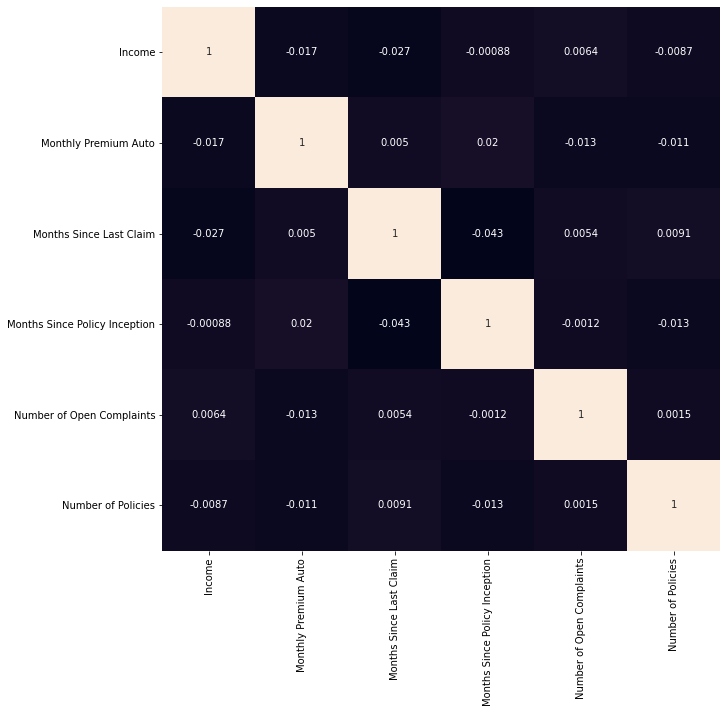

In [10]:
# Check multicollinearity.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

corr_kendall = market_t.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_kendall, annot=True, cbar=False)
plt.show()

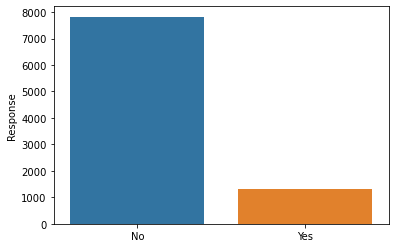

In [11]:
# Show a plot of the total number of responses

counts = market.Response.value_counts()
ax = sns.barplot(x = market.Response.unique(), y = counts, data = market)

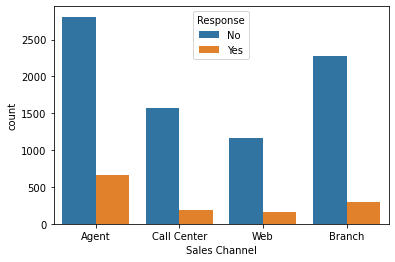

In [12]:
# Show a plot of the response rate by the sales channel

sns.countplot(x='Sales Channel', hue='Response', data=market)
plt.show()

In [ ]:
sns.countplot(x='Income', hue='Response', data=market)
plt.show()

In [ ]:
sns.countplot(x='Total Claim Amount', hue='Response', data=market)
plt.show()

04 - Processing Data

In [13]:
market.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [14]:
# Normalization

market_normalize=market.select_dtypes('number')
data_col=list(market_normalize.columns)

In [15]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(market_normalize)
x_normalized = transformer.transform(market_normalize)

market_normalize.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [16]:
market2=pd.DataFrame(x_normalized,columns=data_col)
market2.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.049048,0.998772,0.001225,0.000568,0.000089,0.0,0.000018,0.006830
1,0.987006,0.000000,0.013293,0.001838,0.005939,0.0,0.001131,0.160005
2,0.255478,0.966747,0.002141,0.000357,0.000753,0.0,0.000040,0.011230
3,0.997473,0.000000,0.013829,0.002348,0.008480,0.0,0.000913,0.069128
4,0.064055,0.997940,0.001662,0.000273,0.001002,0.0,0.000023,0.003145


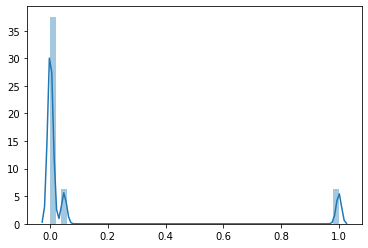

In [17]:
sns.distplot(x_normalized[0])
plt.show()

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculvif(x):
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return(vif)

x = market_normalize.iloc[:,:-1]
calculvif(x)

,variables,VIF
0,Customer Lifetime Value,2.805772
1,Income,2.278732
2,Monthly Premium Auto,6.363674
3,Months Since Last Claim,2.782622
4,Months Since Policy Inception,3.265764
5,Number of Open Complaints,1.166609
6,Number of Policies,2.297052


In [19]:
data7 = market_normalize.drop(['Monthly Premium Auto'],axis=1)
calculvif(data7)

,variables,VIF
0,Customer Lifetime Value,2.464493
1,Income,2.238585
2,Months Since Last Claim,2.687899
3,Months Since Policy Inception,3.092350
4,Number of Open Complaints,1.163372
5,Number of Policies,2.265310
6,Total Claim Amount,3.002417


In [20]:
# Encoding Categorical Data.
data = market.drop(columns = ["Customer Lifetime Value","Income","Monthly Premium Auto","Months Since Last Claim","Months Since Policy Inception","Number of Open Complaints","Number of Policies","Number of Policies", "Total Claim Amount", "Customer", "Effective To Date"], inplace=False)
data.head()

,State,Response,Coverage,Education,Employment Status,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [21]:
data.dtypes

State                object
Response             object
Coverage             object
Education            object
Employment Status    object
Gender               object
Location Code        object
Marital Status       object
Policy Type          object
Policy               object
Renew Offer Type     object
Sales Channel        object
Vehicle Class        object
Vehicle Size         object
dtype: object

In [22]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(handle_unknown='error').fit(data)
encoded = encoder.transform(data).toarray()
encoded_names = list(encoder.get_feature_names())

data_e = pd.get_dummies(data, drop_first = True)


display(data_e)

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,1,0,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [23]:
encoded.shape

(9134, 57)

In [24]:
df = pd.DataFrame(encoded,columns=encoded_names)
df.head()

,x0_Arizona,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_No,x1_Yes,x2_Basic,x2_Extended,x2_Premium,...,x11_Web,x12_Four-Door Car,x12_Luxury Car,x12_Luxury SUV,x12_SUV,x12_Sports Car,x12_Two-Door Car,x13_Large,x13_Medsize,x13_Small
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
# Concatenation

y = market2["Total Claim Amount"]
x = market2.drop("Total Claim Amount", axis=1)
x = x.select_dtypes('number')
transformer =Normalizer().fit(x)
x_normalized = transformer.transform(x)
df_new = pd.DataFrame(x_normalized)
data = pd.concat([df, df_new], join = 'inner', axis = 1)
data.head()

,x0_Arizona,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_No,x1_Yes,x2_Basic,x2_Extended,x2_Premium,...,x13_Large,x13_Medsize,x13_Small,0,1,2,3,4,5,6
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.049049,0.998795,0.001225,0.000568,0.000089,0.0,0.000018
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.999889,0.000000,0.013466,0.001862,0.006017,0.0,0.001146
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.255494,0.966808,0.002141,0.000357,0.000753,0.0,0.000040
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.999865,0.000000,0.013862,0.002354,0.008500,0.0,0.000915
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.064055,0.997944,0.001662,0.000273,0.001002,0.0,0.000023


In [26]:
# Splitting into train set and test set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

05 - Modeling

In [27]:
# Apply model

from sklearn.linear_model import LinearRegression

regression = LinearRegression()
model = regression.fit(x_train,y_train)
y_pred = model.predict(x_test)

print(y_pred)

[0.00360032 0.03129694 0.00737697 ... 0.00785053 0.00532057 0.00813376]


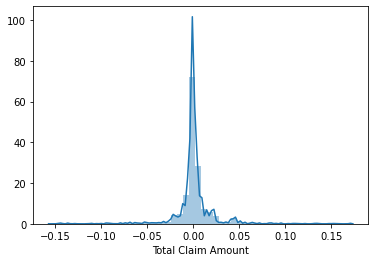

In [29]:
res = y_pred - y_test
sns.distplot(res)

06 - Model Validation

In [30]:
# R2. MSE. RMSE. MAE.

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

R2=r2_score(y_test, y_pred)
MSE=mean_squared_error(y_test, y_pred)
RMSE=sqrt(MSE)
MAE=mean_absolute_error(y_test, y_pred)

print("MAE = ", MAE)
print("R2  = ", R2)
print("MSE = ", MSE)
print("RMSE = ", RMSE)

MAE =  0.010252804590244993
R2  =  0.8448908436828297
MSE =  0.0004768610203469513
RMSE =  0.02183714771546301
